In [9]:
## import data from a csv file

import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

file = "C:\\Users\\aksha\\data_analysis_job_market\\dataset\\data_jobs.csv"
df = pd.read_csv(file)

# 1.clean the data by converting the job_posted_date into a datetime object from a string

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#df['job_posted_month_no'] = df.job_posted_date.dt.month

## 2.filter out job postings only inside of the United States

df_US = df[df['job_country']=='United States'].copy()

## 3.I want month in it's name format and not number

df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
print(df_US)

             job_title_short                                          job_title      job_location            job_via         job_schedule_type  job_work_from_home            search_location     job_posted_date  job_no_degree_mention  job_health_insurance    job_country salary_rate  salary_year_avg  salary_hour_avg                   company_name                                         job_skills                                    job_type_skills job_posted_month
0       Senior Data Engineer  Senior Clinical Data Engineer / Principal Clin...     Watertown, CT    via Work Nearby                 Full-time               False       Texas, United States 2023-06-16 13:44:15                  False                 False  United States         NaN              NaN              NaN           Boehringer Ingelheim                                                NaN                                                NaN             June
3              Data Engineer  LEAD ENGINEER - PRINCIPAL ANALYST - PR

Text(0.5, 1.0, 'Job postings for top jobs per month')

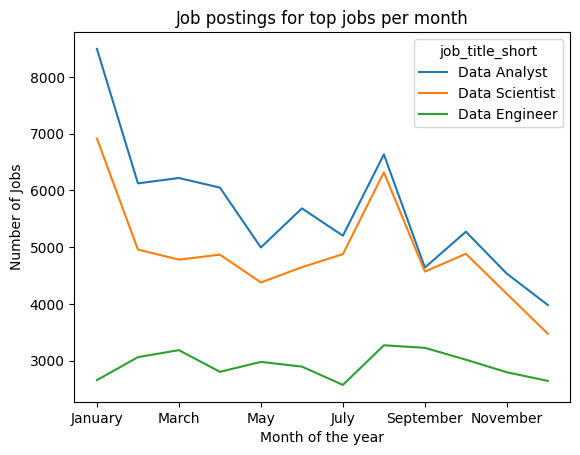

In [15]:
## find the number of jobs per job title every month: using a pivot table the data can be grouped and aggregated

df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short' , aggfunc='size')

## The index is now name of the month that cannot be sorted directly
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot.index, format='%B').month
df_US_pivot.sort_values('month_no',inplace=True)

top_jobs = df_US['job_title_short'].value_counts().head(3).index

# need to plot only the top three jobs with the maximum job postings

df_US_pivot[top_jobs].plot(kind = 'line')
plt.ylabel('Number of Jobs')
plt.xlabel('Month of the year')
plt.title('Job postings for top jobs per month')

